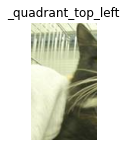

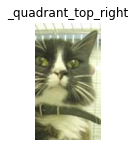

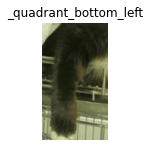

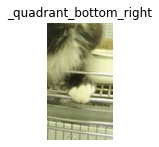

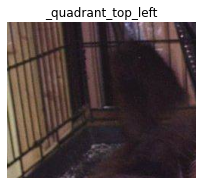

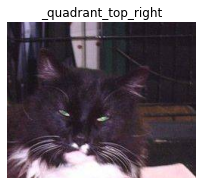

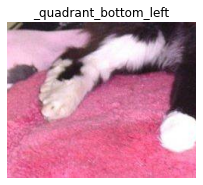

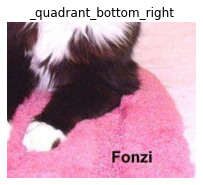

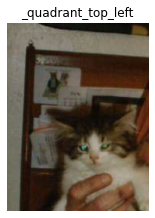

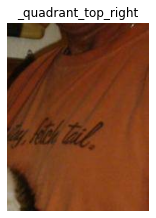

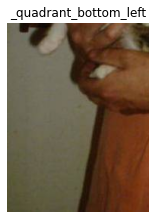

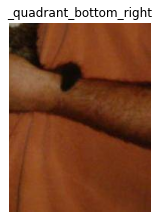

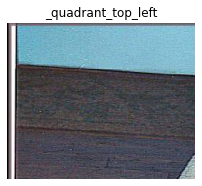

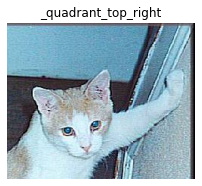

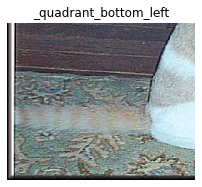

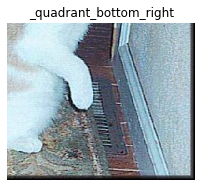

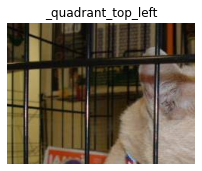

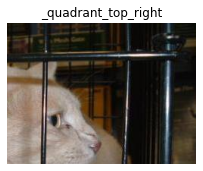

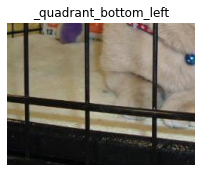

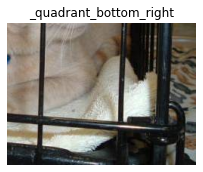

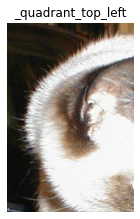

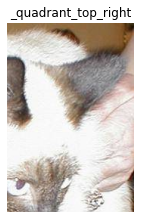

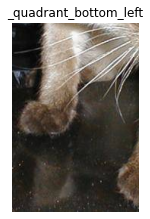

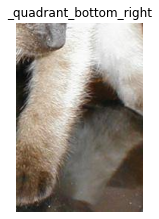

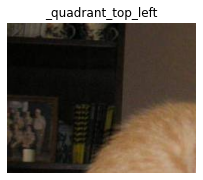

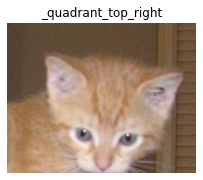

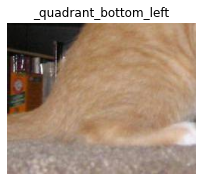

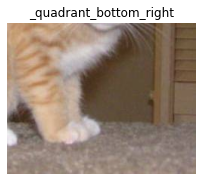

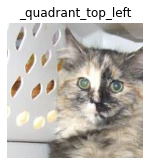

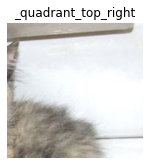

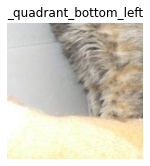

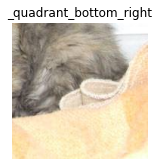

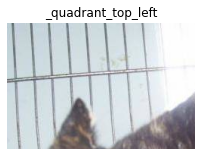

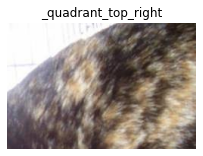

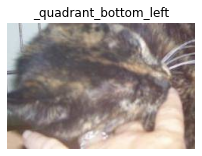

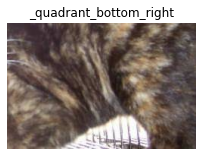

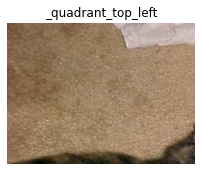

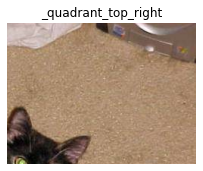

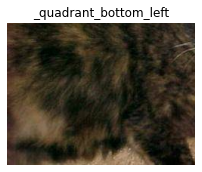

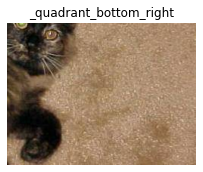

                          filename width height
0       cat.4007_quadrant_top_left    87    155
1      cat.4007_quadrant_top_right    87    155
2    cat.4007_quadrant_bottom_left    87    155
3   cat.4007_quadrant_bottom_right    87    155
4       cat.4010_quadrant_top_left   250    206
5      cat.4010_quadrant_top_right   250    206
6    cat.4010_quadrant_bottom_left   250    206
7   cat.4010_quadrant_bottom_right   250    206
8       cat.4002_quadrant_top_left   187    249
9      cat.4002_quadrant_top_right   188    249
10   cat.4002_quadrant_bottom_left   187    250
11  cat.4002_quadrant_bottom_right   188    250
12      cat.4001_quadrant_top_left   249    207
13     cat.4001_quadrant_top_right   249    207
14   cat.4001_quadrant_bottom_left   249    208
15  cat.4001_quadrant_bottom_right   249    208
16      cat.4008_quadrant_top_left   249    187
17     cat.4008_quadrant_top_right   250    187
18   cat.4008_quadrant_bottom_left   249    188
19  cat.4008_quadrant_bottom_right   250

In [14]:
# import necessary libraries
import os
import sys
sys.path.append(os.path.join("..")) # to be able to use the jimshow function

from utils.imutils import jimshow
import cv2
import glob
import numpy as np
import pandas as pd
import re

# define filepath
filepath = os.path.join("..", "data", "img", "homework_1") 

# get all jpg images in the folder that the filepath leads to
images = glob.glob(filepath +  "/*.jpg")

# read the images
for image in images:
    img = cv2.imread(image)

# prepare panda to write logs
columns = ['filename', 'width', 'height']
index = np.arange(0)
split_image_data = pd.DataFrame(columns=columns, index = index)


# for loop for manipulating the images
for image in images: 
    
    _, image_id = os.path.split(image) # use a dummy variable to isolate the image name (and leave out the path)        
    image_id = re.split('\.jpg', image_id)[0] # to leave out the ".jpg"
    
    img = cv2.imread(image) # read image
    
    shape = img.shape # get the shape of the images, i.e. the number of rows, columns and channels
    height = shape[0] # using the index of the "shape" object, call the number of rows "height"
    width = shape[1] # call the number of columns "width"
    channels = shape[2] # call the number of channels "channels"
    
    quadrant_top_left = img[0:int(height/2), 0:int(width/2)] # get the top left quadrant by indexing the necessary pixels 
    # for the above, we want rows 0 to half the height, and columns 0 to half the width
    # I use int() before splitting the height and width, because I need whole numbers of pixels
    quadrant_top_right = img[0:int(height/2), int(width/2):width] # follow the same logic to the other quadrants
    quadrant_bottom_left = img[int(height/2):height, 0:int(width/2)]
    quadrant_bottom_right = img[int(height/2):height, int(width/2):width]
    
    # make a dictionary containing the image object and the name of the image for each of the four quadrants 
    split_images = [
        {
            "image": quadrant_top_left,
            "name": "_quadrant_top_left" # I put an underscore in front of the name, 
            #so that when it's appended to the original image name, it looks nice, like "cat.4001_quadrant_top_left"
        },
        {
            "image": quadrant_top_right, # same logic with the rest of the quadrants
            "name": "_quadrant_top_right"
        }, 
        {
            "image": quadrant_bottom_left,
            "name": "_quadrant_bottom_left"
        }, 
        {
            "image": quadrant_bottom_right,
            "name": "_quadrant_bottom_right"
        }     
    ]
    
    # make a nested for loop to iterate through the four quadrant images
    for split_image in split_images:
        
        jimshow(split_image["image"], split_image["name"]) # check that we get the right images        
        outfile_name = image_id + split_image["name"] + ".jpg" # prepare outfile names
        outfile_path = os.path.join(filepath, outfile_name) # prepare outfile paths
        cv2.imwrite(outfile_path, split_image["image"]) # write images
        
        shape_split = split_image["image"].shape # get the shape of the images, i.e. the number of rows, columns and channels
        height_split = shape_split[0] # using the index of the "shape_split" object, call the number of rows "height_split"
        width_split = shape_split[1] # call the number of columns "width_split"
        
        # write output to pandas
        split_image_data = split_image_data.append({
            'filename': image_id + split_image["name"], # if I wanted to include ".jpg" in the filename, I would add +".jpg" before the comma
            'width': width_split, # use the width object created just above
            'height': height_split # use the height object created just above
        }, ignore_index=True)   

print(split_image_data) # inspect that the panda gives us the right output

# make outpath to show where to save the data and what to call the csv
outpath = os.path.join("..", "data", "img", "homework_1", "basic_image_processing.csv")

# save the panda as a csv file
split_image_data.to_csv(outpath)   
